In [208]:
# Imports:

import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import torch 
import torch.nn as nn

from collections import OrderedDict
import random

In [ ]:
# Dataset: 
    # Animal Crossing User Reviews
    # - This dataset contains player reviews for the video game Animal Crossing.
    # - Link: https://www.kaggle.com/datasets/jessemostipak/animal-crossing

# The Task: 
    #  Conduct sentiment analysis on the user reviews dataset using neural networks.
    #  Detect if a review is positive or negative, using 7 as the threshold on a scale of 0-10:
        # Positive reviews have grades of 7 or higher
        # Negative reviews have grades of less than 7

In [ ]:
# Step 1: Load and Preprocess Data

In [ ]:
# Display the first 30 reviews in the dataset:

dataset = pd.read_csv("user_reviews.csv" )
dataset.head(30)

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20
5,0,tb726,The limitation of one island per Switch (not p...,2020-03-20
6,0,Outryder86,I was very excited for this new installment of...,2020-03-20
7,0,Subby89,It's 2020 and for some reason Nintendo has dec...,2020-03-20
8,0,RocketRon,This is so annoying. Only one player has the a...,2020-03-20
9,0,chankills,I purchased this game for my household (me and...,2020-03-20


In [4]:
# Read the user_reviews.csv data, store reviews an corresponding grades separately.
reviews = pd.read_csv("user_reviews.csv", usecols = ["text"] )
grades = pd.read_csv("user_reviews.csv", usecols = ["grade"])

In [ ]:
# Tokenize the reviews by word:
review_list = [ nltk.word_tokenize(r[0].lower()) for r in reviews.to_numpy() ]

# Get the grades into numpy and then int format for readability:
grades_list = [ g[0] for g in grades.to_numpy() ]

# Make tuples for each review and its corresponding grade: (review, grade)
tuple_user_reviews = list(zip(review_list, grades_list))

# Display the first tokenized review and its grade:
print(tuple_user_reviews[0])

(['my', 'gf', 'started', 'playing', 'before', 'me', '.', 'no', 'option', 'to', 'create', 'my', 'own', 'island', 'and', 'guys', ',', 'being', 'the', '2nd', 'player', 'to', 'start', 'on', 'a', 'console', 'sucks', '!', '!', '!', '!', 'you', 'miss', 'out', 'on', 'so', 'much', 'that', 'only', 'the', '1st', 'player', 'gets', 'in', 'terms', 'of', 'activities', ',', 'resources', ',', 'etc', '.', 'it', "'s", 'absolutely', 'terrible', '.', 'you', 'have', 'to', 'buy', 'a', '2nd', 'console', 'if', 'more', 'than', 'one', 'person', 'in', 'your', 'household', 'wants', 'to', 'get', 'the', 'full', 'game', 'experience', '.', 'that', "'s", 'unacceptable', '.'], 4)


In [6]:
# A function for finalizing the preprocessing of each review:

def preprocess(all_docs):
        # Iterate through each tuple in documents to remove stopwords in each review:
    for r in range(0, len(all_docs)): 
            # Get the document whose index corresponds to the current loop iteration number:
        doc = all_docs[r]
            # Remove stopwords, punctuation, and special characters from the review:
        review = [ w for w in doc[0] if w not in stopwords.words("english") and w.isalnum()]
            # Update the documents list to contain the fully preprocessed review:
        all_docs[r] = ( review, doc[1] )

In [7]:
# Preprocess the tuple-ized dataset of user reviews and grades:
preprocess(tuple_user_reviews)

In [60]:
# Display the first 10 (review, grade) tuples:

for r in tuple_user_reviews[:10]:
    print(r)

(['gf', 'started', 'playing', 'option', 'create', 'island', 'guys', '2nd', 'player', 'start', 'console', 'sucks', 'miss', 'much', '1st', 'player', 'gets', 'terms', 'activities', 'resources', 'etc', 'absolutely', 'terrible', 'buy', '2nd', 'console', 'one', 'person', 'household', 'wants', 'get', 'full', 'game', 'experience', 'unacceptable'], 4)
(['game', 'great', 'really', 'relaxing', 'gorgeous', 'ca', 'ignore', 'one', 'thing', 'ruins', 'whole', 'experience', 'lot', 'people', 'seen', 'different', 'user', 'thing', '1', 'island', 'per', 'console', 'decision', 'limits', 'one', 'person', 'able', 'enjoy', 'full', 'experience', 'also', 'nukes', 'creative', 'control', 'island', 'since', 'havewhile', 'game', 'great', 'really', 'relaxing', 'gorgeous', 'ca', 'ignore', 'one', 'thing', 'ruins', 'whole', 'experience', 'lot', 'people', 'seen', 'different', 'user', 'thing', '1', 'island', 'per', 'console', 'decision', 'limits', 'one', 'person', 'able', 'enjoy', 'full', 'experience', 'also', 'nukes', 'c

In [ ]:
# Prepare the data in TFIDF format to be read by the neural network model.
# - Vectorize the reviews with TFIDF
# - Convert grades, which are on a scale of 0 to 10, into a binary format of 0 or 1
# - Pair reviews with corresponding labels as tuples:
#   - (vectorized review, binary grade)

# Gather all review text into strings representing each review:
all_text = [ " ".join(map(str, r[0])) for r in tuple_user_reviews ]

# Gather all user grades and reduce them into binary form.
# User grades < 7 are represented by label 0, and grades >= 7 are represented by label 1.
all_labels = [ 0 if r[1] < 7 else 1 for r in tuple_user_reviews ]

# Set up the vectorizer and use it to transform the textual data to be numerically-readable for the model:
vectorizer = TfidfVectorizer()
all_x = vectorizer.fit_transform(all_text)

# Put all the vectorized data into TF-IDF matrix form for readability.
# Each row is a review, each column a word in the vocabulary of words appearing in each review.
matrix_all = all_x.toarray()

In [74]:
    # Create and display a dataframe for visualizing the TFIDF matrix:
all_df = pd.DataFrame(matrix_all, index=all_text, columns=vectorizer.get_feature_names_out())
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

print(all_df)

                                                     0s   10  100  1000  \
gf started playing option create island guys 2n...  0.0  0.0  0.0   0.0   
game great really relaxing gorgeous ca ignore o...  0.0  0.0  0.0   0.0   
wife looking forward playing game released boug...  0.0  0.0  0.0   0.0   
need equal values opportunities players island ...  0.0  0.0  0.0   0.0   
beware multiple people house want play game acc...  0.0  0.0  0.0   0.0   
...                                                 ...  ...  ...   ...   
1 island console play game girlfriend played 12...  0.0  0.0  0.0   0.0   
per giocare con figli fidanzate mogli persone d...  0.0  0.0  0.0   0.0   
one island per console pathetic limitation ende...  0.0  0.0  0.0   0.0   
even though seems like great game many items ch...  0.0  0.0  0.0   0.0   
game deciding make one island per console basic...  0.0  0.0  0.0   0.0   

                                                    10000  100debe  100k  \
gf started playing opti

In [ ]:
# Keep each vectorized review paired with its corresponding label as a tuple:
tuple_vector_reviews = []

    # Loop through the matrix indices and access reviews and labels:
for i in range(len(matrix_all)):

        # Each row vector is one review:
    row_vector = matrix_all[i]

        # A review's corresponding 0 or 1 label will be at the same index of all_labels:
    label = all_labels[i]

        # Store a (vectorized review, binary label) tuple:
    tuple_vector_reviews.append((row_vector, label))

    # Display the first ten vectorized reviews and their binary grades:
for v in tuple_vector_reviews[:10]:
    print(v)

(array([0., 0., 0., ..., 0., 0., 0.]), 0)
(array([0., 0., 0., ..., 0., 0., 0.]), 0)
(array([0., 0., 0., ..., 0., 0., 0.]), 0)
(array([0., 0., 0., ..., 0., 0., 0.]), 0)
(array([0., 0., 0., ..., 0., 0., 0.]), 0)
(array([0., 0., 0., ..., 0., 0., 0.]), 0)
(array([0., 0., 0., ..., 0., 0., 0.]), 0)
(array([0., 0., 0., ..., 0., 0., 0.]), 0)
(array([0., 0., 0., ..., 0., 0., 0.]), 0)
(array([0., 0., 0., ..., 0., 0., 0.]), 0)


In [ ]:
# Split all vectorized documents and labels into test and train with an 70:30 split:
train_vectors, test_vectors = train_test_split(tuple_vector_reviews, test_size=0.30, shuffle=True)

In [ ]:
# Step 2: Train a Feedforward Neural Network

In [ ]:
# Building a neural network model:

# The model will take as input one TFIDF representation of a review at a time, as represented by a row in matrix_train.
# The model's output will be a tensor holding two values: one representing confidence for the negative review class and the other representing confidence for the positive review class.

# The length of reviews in train_vectors is used to determine layer input size, however they are the same for reviews in test_vectors as they all come from the same TFIDF matrix; they hold the same vocabulary or number of features.

model = nn.Sequential(OrderedDict([
        # Input is 1 vectorized review. All reviews are of the length as defined by the TFIDF transformation.
        # For each layer:
            # nn.Linear(size of layer input, size of output feeding into the next layer)
                                                  # The second parameter is chopped in half to reduce dimensionality in hopes of getting a clearer "zoomed-in" view of feature patterns in the each review.
    ("input", nn.Linear(len(train_vectors[0][0]), len(train_vectors[0][0]) // 2)),
    
    ("activation", nn.ReLU()), # Use RELU for activating the hidden layers.
                                                  # Reducing the second parameter again:
    ("hidden_1", nn.Linear(len(train_vectors[0][0]) // 2, len(train_vectors[0][0]) // 4)),
    
    ("activation", nn.ReLU()), # Use RELU for activating the hidden layers.
        
                        # nn.Linear(size of layer input, size of 2 to represent the 2 classes being predicted: positive and negative sentiment.)
    ("output", nn.Linear(len(train_vectors[0][0]) // 4, 2)),

    ("activation", nn.ReLU()) # Use RELU for activating the hidden layers.

    # Softmax is automatically applied for the output when the nn.CrossEntropyLoss() function is run later in the code.
])
)


# Sources:
    # Train a feedforward neural network, MLP:
# https://machinelearningmastery.com/building-multilayer-perceptron-models-in-pytorch/
    # Softmax layer:
# https://stackoverflow.com/questions/49036993/pytorch-softmax-what-dimension-to-use


In [ ]:
# Comparing model input size to its output size:
print("Input vector length:", len(tuple_vector_reviews[0][0])) # Length of a vectorized review: 11294
print("Output vector length:", 2) # Length of 2: positive class, negative class

In [ ]:
# Step 3: Train the Model

In [ ]:
# Set up loss function and optimizer object.
loss_fn = nn.CrossEntropyLoss() # Cross entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimizer

In [ ]:
# Train the model with 1 epoch:

# Initialize accuracy, to be incremented with each correct prediction:
train_accuracy = 0

    # Outer loop is the epoch loop:
    # Each epoch loops through the training dataset epoch == 1 times:
for epoch in range(1):

        # Inner loop is the batch loop:
        # 1 batch == 1 review; each iteration is training the model on 1 review:
    for batch in range(len(train_vectors)):
            # Set model up for training:
        model.train()
        optimizer.zero_grad()

            # The model outputs a 1D tensor, each of the two indices holding a value predicted for each class:
            # output[0] == negative class
            # output[1] == positive class                               # Access index 0 to get the review vector.
        output = model(torch.Tensor.to(torch.tensor(train_vectors[batch][0]), dtype=torch.float32)) # The vectorized review is initially in float64 format, and needed to be converted to float32 to be processed as a tensor by the model.
        print("output:", output)

            # The model chooses the greatest value of the output tensor as the prediction.
            # The predicted label: 0 for negative or 1 for positive:
        predicted_label = int(output.argmax())
        print("predicted label:", int(output.argmax()))

            # The true label as the grade given by users in the training data:
                                  # Access index 1 to get the label
        true_label = train_vectors[batch][1] 
        print("true label:", true_label)
        
            # Compute the loss function:
        loss = loss_fn(output, torch.tensor(true_label)) 
        print("loss:", loss, "\n")

            # Increment accuracy if the prediction is accurate:
        if predicted_label == true_label:
            train_accuracy += 1

            # Updating loss and optimizer to learn better for the next iteration:
        loss.backward()
        optimizer.step()

    # Total accuracy = Ratio of correct predictions / Total number of predictions:
train_accuracy /= len(train_vectors)

# Sources:
    # Training NN:
# https://medium.com/deep-learning-study-notes/multi-layer-perceptron-mlp-in-pytorch-21ea46d50e62
# https://codesignal.com/learn/courses/building-a-neural-network-in-pytorch/lessons/training-a-neural-network-model-with-pytorch
# https://machinelearningmastery.com/building-multilayer-perceptron-models-in-pytorch/

    # Understanding tensors:
# https://pytorch.org/docs/stable/tensors.html
# https://pytorch.org/docs/stable/generated/torch.Tensor.to.html
# https://chatgpt.com/share/67f8ae41-6b60-8000-8576-d8af3c5863f8

output: tensor([-0.0051,  0.0004], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 0
loss: tensor(0.6959, grad_fn=<NllLossBackward0>) 

output: tensor([ 0.3000, -0.3002], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0
loss: tensor(0.4374, grad_fn=<NllLossBackward0>) 

output: tensor([ 0.6786, -0.6745], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0
loss: tensor(0.2299, grad_fn=<NllLossBackward0>) 

output: tensor([ 1.2990, -1.2860], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0
loss: tensor(0.0727, grad_fn=<NllLossBackward0>) 

output: tensor([ 1.9845, -1.9660], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0
loss: tensor(0.0191, grad_fn=<NllLossBackward0>) 

output: tensor([ 3.1676, -3.1356], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0
loss: tensor(0.0018, grad_fn=<NllLossBackward0>) 

output: tensor([ 4.5514, -4.5071], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0
loss: tensor(0.0001, grad_fn=<NllLossBackwa

In [ ]:
# Runtime observations for the above model training cell:

# Initial runtime for 1 epoch: 32m 13.8s
    # This was when the input was not a tuple of (review, label) but only a review vector.
    # Review vectors were held in a training set matrix.
    # Their true labels were in a separate list of the same length as the matrix.

# Current runtime for 1 epoch: 50m 32.1s
    # This is when the loop is having to access the reviews and labels simultaneously, as they are stored in the same data structure, which is a list of (review, label) tuples.
    # This probably increases speed and therefore lowers efficiency.
    # However, this method is chosen to keep vocabulary consistency for the train and test sets; both sets come from the same TFIDF matrix.

In [89]:
# Display the training accuracy:
print(train_accuracy)

# Get accuracy as a percentage:
train_accuracy *= 100
print(train_accuracy)

0.8432586946164841
84.32586946164841


In [ ]:
# Observations on prediction accuracy during training:
# First run: Output rounded to 92.18%
# Second run: 85.18342067651263 %
# Third run: 84.80228680323964 %
# Fourth run: 84.32586946164841 %

# The model seems to predict well, averaging in the mid-80% level of accuracy.

# With one epoch only, the accuracy of the model seems to be slightly unstable. 
# Spending a greater amount of epochs training or adjusting the model structure and parameters may help acheive a consistent, high accuracy.

In [ ]:
# Step 4: Evaluate and Interpret the Model

In [ ]:
# Test the model and evaluate it with the training data:
    
    # Set the neural network to evaluation mode for testing:
model.eval()

    # Initialize accuracy, to be incremented with each correct prediction:
train_eval_accuracy = 0
train_eval_pred = []

    # This code is similar to the most part as the inner loop for model training.
    # The model is tested on one vectorized review from the test set at a time:
for batch in range(len(train_vectors)):

            # The model outputs a 1D tensor, each of the two indices holding a value predicted for each class:
            # output[0] == negative class
            # output[1] == positive class
        output = model(torch.Tensor.to(torch.tensor(train_vectors[batch][0]), dtype=torch.float32))
        print("output:", output)

            # The predicted label: 0 for negative or 1 for positive.
            # The prediction is chosen based on which is larger: output[0] or output[1].
        predicted_label = int(output.argmax())

            # Store prediction in train_eval_pred:
        train_eval_pred.append(predicted_label)
        print("predicted label:", predicted_label)

            # The true label given by users in the testing data:
        true_label = train_vectors[batch][1]
        print("true label:", true_label, "\n")

            # Increment accuracy if the prediction is accurate:
        if predicted_label == true_label:
            train_eval_accuracy += 1

    # Total accuracy = Ratio of correct predictions / Total number of predictions:      
train_eval_accuracy /= len(train_vectors)


# Sources:
    # Understanding Pytorch model.eval() and model.train():
# https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch
# https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch
# Storing accuracy in list idea from Ian in class

output: tensor([ 3.1712, -3.3642], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0 

output: tensor([ 2.3839, -2.4526], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0 

output: tensor([-2.7554,  2.6942], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 0 

output: tensor([ 3.5194, -3.6506], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0 

output: tensor([-4.0555,  3.9795], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 0 

output: tensor([ 0.5840, -0.6445], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0 

output: tensor([ 2.3940, -2.4961], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0 

output: tensor([-2.7591,  2.7306], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 1 

output: tensor([-1.0198,  1.0033], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 1 

output: tensor([-0.0318, -0.0314], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 0 

output: tensor([ 0.6762, -0.7952], grad_fn=<ViewBa

In [ ]:
# Display the testing accuracy on the training data:
print(train_eval_accuracy)

# Get the test accuracy as a percentage:
train_eval_accuracy *= 100
print(train_eval_accuracy)

# The model performs well on the training data with a high accuracy.

# First run: 96.18866126727012 %

0.9618866126727013
96.18866126727012


In [ ]:
# Test the model and evaluate it with unseen data from the test set:
    
    # Set the neural network to evaluation mode for testing:
model.eval()

    # Initialize accuracy, to be incremented with each correct prediction:
test_accuracy = 0
test_pred = []

    # This code is similar to the most part as the inner loop for model training.
    # The model is tested on one vectorized review from the test set at a time:
for batch in range(len(test_vectors)):

            # The model outputs a 1D tensor, each of the two indices holding a value predicted for each class:
            # output[0] == negative class
            # output[1] == positive class
        output = model(torch.Tensor.to(torch.tensor(test_vectors[batch][0]), dtype=torch.float32))
        print("output:", output)

            # The predicted label: 0 for negative or 1 for positive:
            # The prediction is chosen based on which value is larger: output[0] or output[1].
        predicted_label = int(output.argmax())

            # Store prediction in test_pred:
        test_pred.append(predicted_label)
        print("predicted label:", predicted_label)

            # The true label given by users in the testing data:
        true_label = test_vectors[batch][1]
        print("true label:", true_label, "\n")

            # Increment accuracy if the prediction is accurate:
        if predicted_label == true_label:
            test_accuracy += 1

    # Total accuracy = Ratio of correct predictions / Total number of predictions:
test_accuracy /= len(test_vectors)


# Sources:
    # Understanding Pytorch model.eval() and model.train():
# https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch
# https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch


output: tensor([-5.7815,  5.7794], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 1 

output: tensor([-1.8170,  1.8144], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 1 

output: tensor([-0.4239,  0.3810], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 0 

output: tensor([-3.3692,  3.3232], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 1 

output: tensor([ 2.3162, -2.4437], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0 

output: tensor([-2.9617,  2.9710], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 1 

output: tensor([ 2.6841, -2.7831], grad_fn=<ViewBackward0>)
predicted label: 0
true label: 0 

output: tensor([-3.7772,  3.7372], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 1 

output: tensor([-1.6955,  1.6726], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 1 

output: tensor([-1.8430,  1.8216], grad_fn=<ViewBackward0>)
predicted label: 1
true label: 1 

output: tensor([-0.6402,  0.5831], grad_fn=<ViewBa

In [ ]:
# Display the testing accuracy on the test data:
print(test_accuracy)

# Get the test accuracy as a percentage:
test_accuracy *= 100
print(test_accuracy)

# The model performs well on new data, in the late 80% to mid 90% accuracy level.
# This is consistent scoring with the how the model performed while training.

# First run: Rounded to 96% percent
# Second run: 88.66666666666667 %

0.8866666666666667
88.66666666666667


In [156]:
# Displaying the test label predictions on top of the true labels:
true_test_labels = [ tv[1] for tv in test_vectors ]
print("true_test_labels and test_pred lists:")
print(true_test_labels)
print(test_pred)

true_test_labels and test_pred lists:
[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0

In [ ]:
# Classification report on the model testing:
# Includes precision and recall.
print(classification_report(test_pred, true_test_labels))

# The precisions and recall scores seem somewhat inverse for each class:
# - Precision is lower and recall is higher for class 0.
# - Precision is higher while recall is lower for class 1 (positive reviews).
# - The higher scores are about the same in the 90s, while the lower scores are similar in the 80s.

# Accuracy and average are about the same for both classes.


              precision    recall  f1-score   support

           0       0.87      0.94      0.90       497
           1       0.92      0.82      0.87       403

    accuracy                           0.89       900
   macro avg       0.89      0.88      0.88       900
weighted avg       0.89      0.89      0.89       900



[[468  29]
 [ 73 330]]


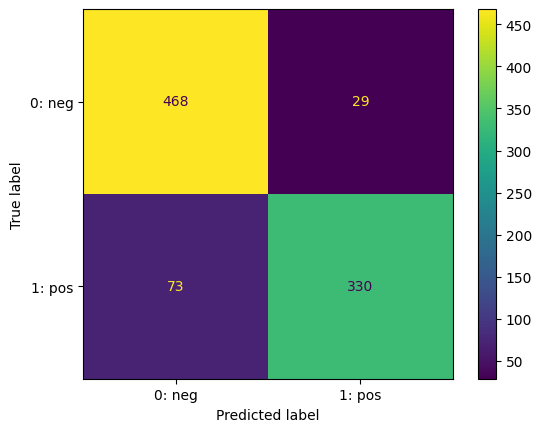

In [107]:
# Confusion matrix

cm_test = confusion_matrix(test_pred, true_test_labels, labels=[0, 1])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=["0: neg", "1: pos"])

# Print and plot the confusion matrix:
print(cm_test)
cm_display.plot()

In [183]:
# Extract and analyze misclassified examples.

# Make tuples of (true label, test predicted label):
true_test_tuples = list(zip(true_test_labels, test_pred))

# Store the indices of incorrect predictions in y_pred, to make extracting wrongfully classified reviews from the original user review dataset easier:
incorrect_indices = []
for i in range(len(true_test_tuples)):
        # If the tuple in true_test_tuples at index i does not match (0, 0) or (1, 1), then the prediction is incorrect.
    if true_test_tuples[i][0] != true_test_tuples[i][1]:
        incorrect_indices.append(i)

# Display:
print("\ntrue_test_tuples:")
print(true_test_tuples)
print("\nincorrect_indices:")
print(incorrect_indices)


true_test_tuples:
[(1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 

In [207]:
# Extract 5 random reviews 
for i in range(5):
    local_idx = random.choice(incorrect_indices)
    global_idx = np.flatnonzero((test_vectors[local_idx][0]==matrix_all).all(1))[0]
    print(f"Misclassified review is at index {global_idx} in the user reviews dataset.\nUser review:")
    print(" ".join(review_list[global_idx]))
    print()
    print("True label:", true_test_tuples[local_idx][0])
    print("True grade:", grades_list[global_idx] )
    print("Predicted label:", true_test_tuples[local_idx][1])
    print("\n\n")

# Sources:
    # Find a vector's index inside of a matrix numpy array:
# https://stackoverflow.com/questions/60635968/find-index-of-a-vector-inside-a-matrix-in-python

Misclassified review is at index 28 in the user reviews dataset.
User review:
it 's immensely disappointing to purchase the game and learn that there is very little value for a family . whereas i can share my other games with my children , the fact that only one of us can make true progress in the game is a letdown and just another example of nintendo being completely tone deaf and out of touch.beyond this , though , the fact that few reviewers discuss this fact isit 's immensely disappointing to purchase the game and learn that there is very little value for a family . whereas i can share my other games with my children , the fact that only one of us can make true progress in the game is a letdown and just another example of nintendo being completely tone deaf and out of touch.beyond this , though , the fact that few reviewers discuss this fact is abhorrent . the game simply does not deserve the praise it is receiving from the media in the face of such a glaring misstep , highlighting

In [ ]:
# Most reviews were in English, but there were a few reviews in other languages that were labelled false negatives or positives due to imbalances in data.
# Some reviews that were gibberish or held irrelevant content were labelled falsely as well.

# Some positive reviews with constructive criticism were labelled as negative.
# Reviewers detailed how they enjoyed the game while also describing what could be better, using words like "disappointed" or "disappointing", which appear frequently in negative reviews..

# On the other hand, negative reviews that described ideals that Animal Crossing did not meet for the reviewer were labelled as positive.
# These reviews mentioned words like "enjoyment", saying that the game lacked it while positive reviews may say the did find "enjoyment" in the game.

# The model seemed to struggle also with classifying very short reviews, and reviews with lots of punctuations, interjections, or multiple letters like "aaaaa"